In [1]:
import scipy as sp
import scipy.interpolate
file = open("salt2_template_0.dat")
lines = file.readlines()
file.close()
    
xtemp = []
ytemp = []
ztemp = []
    
for line in lines:
    
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    xtemp.append(co[0])
    ytemp.append(co[1])
    ztemp.append(co[2])

In [2]:
import numpy as np

xtemp = np.array(xtemp, dtype=float)
ytemp = np.array(ytemp, dtype=float)
ztemp = np.array(ztemp, dtype=float)

In [3]:
print(xtemp)
print(ytemp)
print(ztemp)

[-20. -20. -20. ...  50.  50.  50.]
[2000. 2010. 2020. ... 9180. 9190. 9200.]
[0.         0.         0.         ... 0.02343584 0.02359484 0.02374158]


In [4]:
ztemp = ztemp/max(ztemp)

In [5]:
import scipy.interpolate as interp

gradex,gradey = np.meshgrid(np.linspace(min(xtemp),max(xtemp),70),np.linspace(min(ytemp),max(ytemp),50))

f = interp.griddata((xtemp,ytemp),ztemp,(gradex,gradey),method='linear')


In [6]:
print(f)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.00988262e-05 -2.96780919e-04 ... -2.69020113e-03
  -3.00504924e-03 -3.04088450e-03]
 [ 0.00000000e+00 -2.14402582e-04 -9.01220473e-04 ... -5.86456082e-03
  -6.32546784e-03 -6.38110978e-03]
 ...
 [ 0.00000000e+00  2.44677742e-03  1.03136677e-02 ...  3.08949158e-02
   2.92984857e-02  2.76969052e-02]
 [ 0.00000000e+00  1.18961903e-02  5.01140871e-02 ...  2.99497386e-02
   3.39969993e-02  3.82107987e-02]
 [ 0.00000000e+00  2.08756287e-02  8.79273234e-02 ...  2.96052250e-02
   3.70004774e-02  4.47240316e-02]]


In [7]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
'''
fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')

def init():
    # Plot the surface.
    ax.plot_surface(gradex, gradey, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)

fn = 'M0salt'

ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)
'''

"\nfig = plt.figure()\nax = Axes3D(fig)\nplt.xlabel('time (days)')\nplt.ylabel('wavelength ($\\AA$)')\n\ndef init():\n    # Plot the surface.\n    ax.plot_surface(gradex, gradey, f, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=True)\n    return fig,\n\ndef animate(i):\n    # azimuth angle : 0 deg to 360 deg\n    ax.view_init(elev=10, azim=i*4)\n    return fig,\n\nani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)\n\nfn = 'M0salt'\n\nani.save(fn+'.gif',writer='imagemagick',fps=1000/50)\n"

In [8]:
file = open("M0.dat")
lines = file.readlines()
file.close()
    
xsub = []
ysub = []
zsub = []
    
for line in lines:
    
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    xsub.append(co[0])
    ysub.append(co[1])
    zsub.append(co[2])

In [9]:
xsub = np.array(xsub, dtype=float)
ysub = np.array(ysub, dtype=float)
zsub = np.array(zsub, dtype=float)

In [10]:
zsub = zsub/max(zsub)

In [11]:
gradex,gradey = np.meshgrid(np.linspace(-10,50,61),np.linspace(3800,7500,500))

fsub = interp.griddata((xsub,ysub),zsub,(gradex,gradey),method='linear')

In [12]:
gradey

array([[3800.        , 3800.        , 3800.        , ..., 3800.        ,
        3800.        , 3800.        ],
       [3807.41482966, 3807.41482966, 3807.41482966, ..., 3807.41482966,
        3807.41482966, 3807.41482966],
       [3814.82965932, 3814.82965932, 3814.82965932, ..., 3814.82965932,
        3814.82965932, 3814.82965932],
       ...,
       [7485.17034068, 7485.17034068, 7485.17034068, ..., 7485.17034068,
        7485.17034068, 7485.17034068],
       [7492.58517034, 7492.58517034, 7492.58517034, ..., 7492.58517034,
        7492.58517034, 7492.58517034],
       [7500.        , 7500.        , 7500.        , ..., 7500.        ,
        7500.        , 7500.        ]])

/usr/lib/python3/dist-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


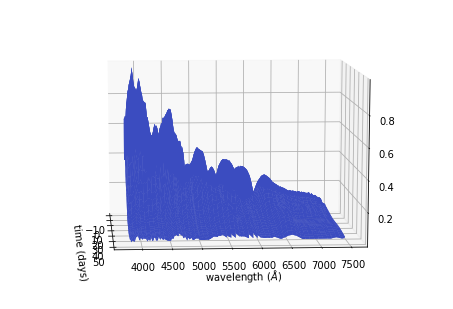

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')

def init():
    # Plot the surface.
    ax.plot_surface(gradex, gradey, fsub, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)

fn = 'M0my'

ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)

In [14]:
xx_temp = np.linspace(-10,50,61)
yy_temp = np.linspace(3800,7500,500)

In [15]:
gradex,gradey = np.meshgrid(xx_temp,yy_temp)

In [16]:
xx_temp

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.])

In [17]:
supref = interp.griddata((xtemp,ytemp),ztemp,(gradex,gradey),method='nearest')/max(ztemp)

In [18]:
supsub = interp.griddata((xsub,ysub),zsub,(gradex,gradey),method='nearest')/max(zsub)

In [19]:
import math
xx = []
yy = []
zz = []
for i in range(0,len(xx_temp)):
    for j in range(0,len(yy_temp)):
        
        if math.isnan(supref[j][i]) == False and math.isnan(supsub[j][i]) == False and supref[j][i] != 0:
            
            xx.append(xx_temp[i])
            yy.append(yy_temp[j])
            zz.append(abs((supref[j][i] - supsub[j][i])/supref[j][i]))

In [20]:
zz

[0.15405996034613043,
 0.09749904869182476,
 0.09749904869182476,
 0.07692380905429823,
 0.05905501504837914,
 0.08168648693296457,
 0.08168648693296457,
 0.016754834147910888,
 0.0030938750076961417,
 0.01845012883920004,
 0.01845012883920004,
 0.04333108145557835,
 0.010695168506903673,
 0.12045864191273357,
 0.12045864191273357,
 0.029241258844784603,
 0.04244277209689842,
 0.008243513996995466,
 0.008243513996995466,
 0.008055917866716295,
 0.09702605837777699,
 0.038456159147606105,
 0.038456159147606105,
 0.03741786205777507,
 0.00031344436835251344,
 0.03981331901079324,
 0.03981331901079324,
 0.10103443769071328,
 0.0517242457878476,
 0.010979939662421402,
 0.010979939662421402,
 0.057835479868694216,
 0.03468019991824667,
 0.03468019991824667,
 0.022479551254274335,
 0.003551572852320458,
 0.1424071358128469,
 0.1424071358128469,
 0.07390037650182724,
 0.0951701776421226,
 0.06795598607497956,
 0.06795598607497956,
 0.16555045388959386,
 0.024395906952551484,
 0.11406033001162

In [21]:
gradex,gradey = np.meshgrid(np.linspace(-10,50,61),np.linspace(3800,7500,500))

fcomp = interp.griddata((xx,yy),zz,(gradex,gradey),method='linear')

In [22]:
fcomp

array([[0.15405996, 0.22788189, 0.23745335, ..., 0.56268185, 0.57809637,
        0.59128867],
       [0.09749905, 0.16199356, 0.17249313, ..., 0.90747351, 0.99537744,
        1.08934092],
       [0.09749905, 0.16199356, 0.17249313, ..., 0.68046609, 0.75790862,
        0.84068956],
       ...,
       [0.28643423, 0.31445088, 0.33485214, ..., 0.10510124, 0.02717393,
        0.06193403],
       [0.28643423, 0.31445088, 0.33485214, ..., 0.10510124, 0.02717393,
        0.06193403],
       [0.28004134, 0.30723947, 0.3267404 , ..., 0.03583273, 0.0666048 ,
        0.18912708]])

<IPython.core.display.Javascript object>


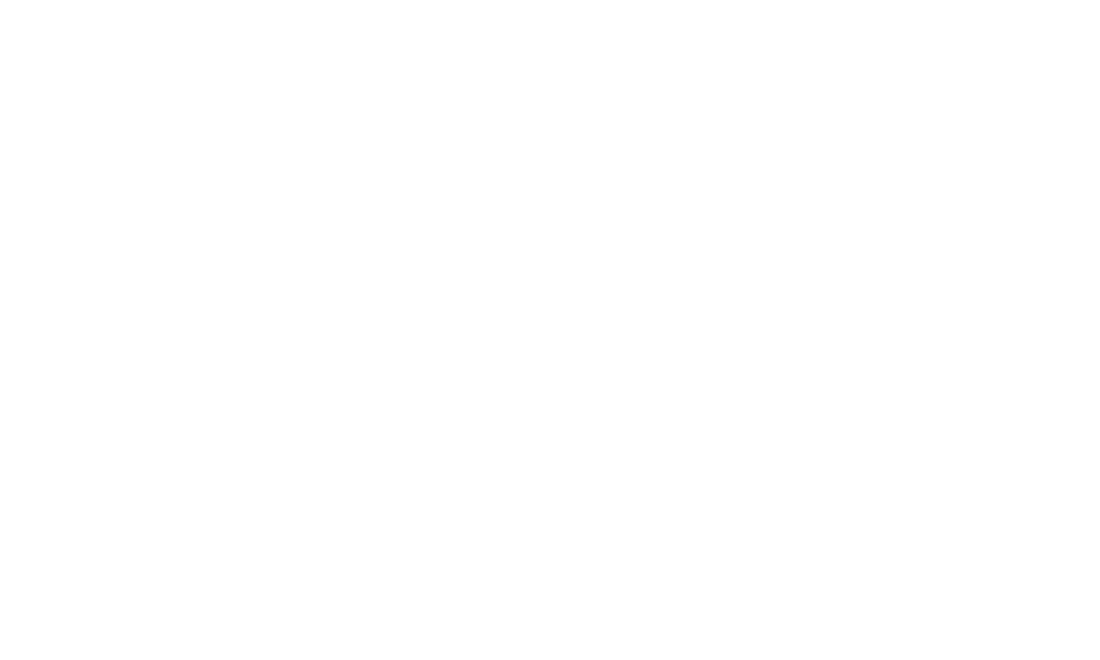

In [23]:
%matplotlib notebook

fig3=plt.figure(figsize=(10,6))
ax3=plt.axes(projection='3d')

surf=ax3.plot_surface(gradey, gradex, fcomp, alpha=1)
ax3.title.set_text('discrepancia')
ax3.set_xlabel('wavelength')
ax3.set_ylabel('time')
ax3.set_xlim(3750, 7000)
ax3.set_ylim(-15, 40)
#ax3.set_zlim(-1, 1)
plt.show()

<IPython.core.display.Javascript object>


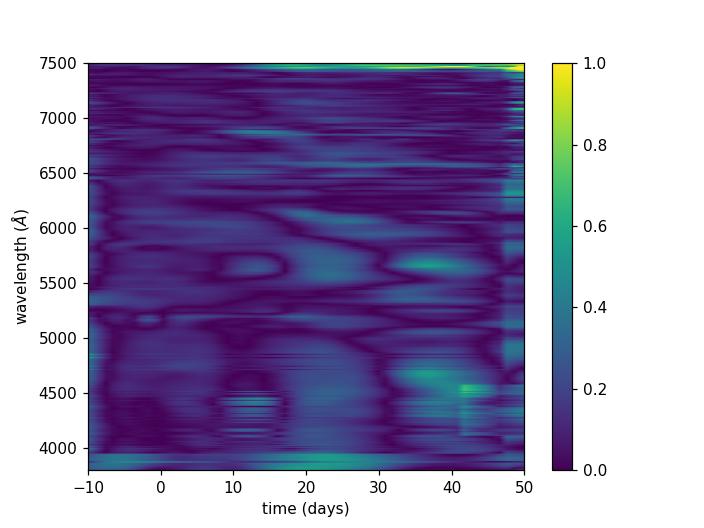

In [29]:
import matplotlib.cm as cm
import numpy as np
%matplotlib notebook
#x, y, z = np.loadtxt('density.dat', unpack=True)
#z = z.reshape(50,50)
plt.imshow(fcomp, extent=(np.amin(gradex), np.amax(gradex), np.amin(gradey), np.amax(gradey)), cmap=cm.viridis, aspect='auto', interpolation = 'bilinear')
plt.colorbar()
plt.clim(0,1)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')
plt.savefig('densityplot.png')
plt.show()
